<a href="https://colab.research.google.com/github/apriarami789/image_clasification/blob/main/Image_Clasification_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir : Klasifikasi Gambar
Nama : Mhd. Apri Arami

In [8]:
# import library yang nanti banyak digunakan pada pengolahan data proyek akhir ini

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selanjutnya kita menginstall library ```split-folders``` yang berguna untuk memisahkan gambar menjadi data gambar train, validation dan test.



In [ ]:
!pip install split-folders

selanjutnya kita akan membagi data gambar dengan 3 kelas (rock, paper, and scissors) ke 3 folder train, validation and test

In [ ]:
# melihat folder gambar berdasarkan kelas (rock, scissors, paper)
import os
import splitfolders

path_top = "drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning"        # nama path folder
print(os.listdir(path_top))                                             # list folder

['rock', 'scissors', 'paper', 'rockpaperscissors_split']


In [ ]:
for i in os.listdir(path_top):
  path_new = os.path.join(path_top,i)                                   # path untuk mengarahkan ke folder kelas
  number = os.listdir(path_new)                                         # menjumlahkan isi folder dari setiap kelas
  print(r"{0} jumlah file data {1}{2:>5} file".format(i,'\t',len(number)))

rock jumlah file data 	  738 file
scissors jumlah file data 	  767 file
paper jumlah file data 	  755 file
rockpaperscissors_split jumlah file data 	    3 file


tertera diatas jumlah gambar di setiap kelas

selanjutnya kita membagi dataset gambar menjadi :
*   50 % untuk data train
*   40 % untuk data validation
*   10 % untuk data test

In [ ]:
path_split = os.path.join(path_top,"rockpaperscissors_split")
splitfolders.ratio(path_top,seed=2204, output=path_split, ratio=(0.5, 0.4, 0.1))

Copying files: 2260 files [01:45, 21.34 files/s]


kita check jumlah file di setiap folder

In [ ]:
# fungsi melihat directory dan jumlah file yang ada di dalamnya
def number_file_dir(path_outer):
  for filename in os.listdir(path_outer):
    print(filename,"dataset")
    path_class = os.path.join(path_outer,filename)
    number_all,number_in = 0,0

    if len(os.listdir(path_class)) != 0 :
      for classs in os.listdir(path_class):
        path_in = os.path.join(path_class,classs)
        number_in = len(os.listdir(path_in))
        print(r"folder {0} berjumlah = {1}{2:>8} file ".format(classs,'\t',number_in))

        number_all = number_all + number_in

    print(r"folder {0} total berjumlah = {1}{2:>8} file".format(filename,'\t',number_all))
    print("\n")

In [ ]:
number_file_dir(path_split)

train dataset
folder rock berjumlah = 	     369 file 
folder scissors berjumlah = 	     383 file 
folder paper berjumlah = 	     377 file 
folder train total berjumlah = 	    1129 file


val dataset
folder rock berjumlah = 	     295 file 
folder scissors berjumlah = 	     306 file 
folder paper berjumlah = 	     302 file 
folder val total berjumlah = 	     903 file


test dataset
folder rock berjumlah = 	      74 file 
folder scissors berjumlah = 	      78 file 
folder paper berjumlah = 	      76 file 
folder test total berjumlah = 	     228 file




setelah kita mengetahui jumlah file di setiap folder train, val, dan test data selanjutnya menginspeksi file gambar. Untuk ini kita perlu mengimport library ```opencv``` yang berguna untuk praprocessing data gambar



In [ ]:
import glob

path_list = []
for dataset in os.listdir(path_split):
  path_dataset = os.path.join(path_split,dataset)
  for classs in os.listdir(path_dataset):
    if classs != "rockpaperscissors_split" :
      path_class = os.path.join(path_dataset,classs)
      path_list.append(path_class)

```path_list``` ini berguna untuk memanggil dataset setiap kelas pada directory train, val atau test pada saat pemrosesan data



In [ ]:
path_list

['drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/train/rock',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/train/scissors',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/train/paper',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/val/rock',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/val/scissors',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/val/paper',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/test/rock',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/test/scissors',
 'drive/MyDrive/Tugas_Dicoding/Basic_Machine_Learning/rockpaperscissors_split/test/paper']

selanjutnya menampilkan beberapa contoh gambar pada setiap label/kelas

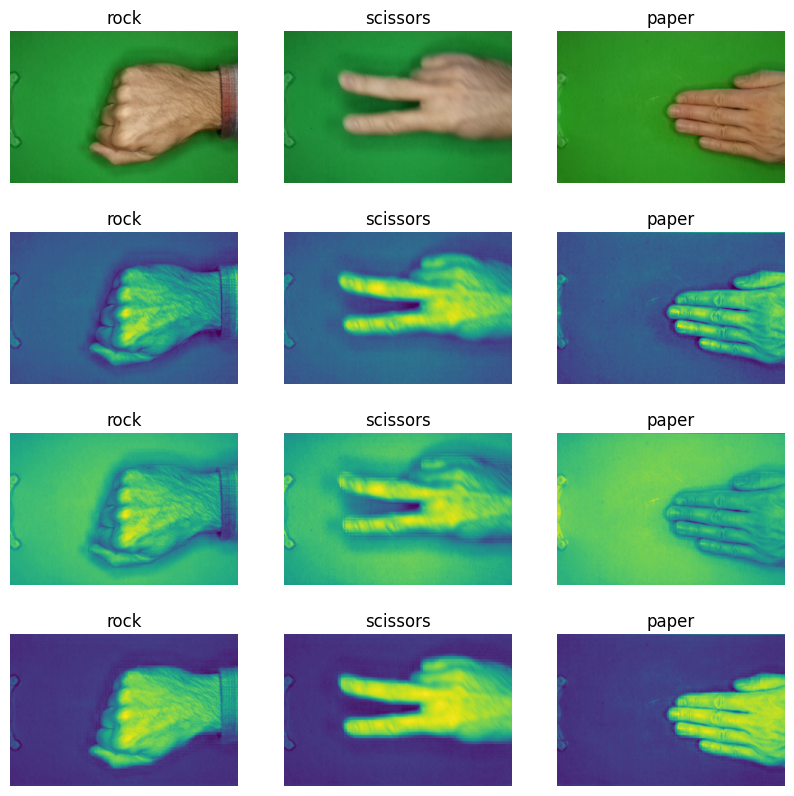

In [ ]:
import cv2

label = ['rock','scissors','paper']
img1 = []
img1_b = []
img1_g = []
img1_r = []

for i in range(3):
  image_file = glob.glob(os.path.join(path_list[i],'*'))
  image = cv2.imread(image_file[0])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  img1.append(image)

  r_channel, g_channel, b_channel = cv2.split(image)
  img1_r.append(r_channel)
  img1_g.append(g_channel)
  img1_b.append(b_channel)


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
list_img = [img1,img1_b,img1_g,img1_r]

for i in range(4):
  imgg = list_img[i]
  for j in range(3):
    axes[i,j].imshow(imgg[j])
    axes[i,j].set_title(label[j])
    axes[i,j].axis('off')

In [ ]:
# dimensi file gambar
image.shape

(200, 300, 3)

dimensi gambar y = 200 pixel, x = 300 pixel, dan 3 channel (RGB)

In [ ]:
# mengecek apakah dimensi gambar setiap image sama semua (200, 300, 3)
for i in range(3):
  image_file = glob.glob(os.path.join(path_list[i],'*'))
  for idx, img in enumerate(image_file) :
    image = cv2.imread(img)
    dims_img = image.shape == (200,300,3)
    if dims_img is False :
      image_name = os.path.split(image_file)[-1]
      print(r"folder {0} dengan nama file {1} diurutan {2}",format(path_list[i],image_name,idx))

setelah di cek rupanya dimensi gambar setiap file pada folder train sama semua. sehingga file tidak ada yang dibuang

array([[[ 34, 117,  39],
        [ 34, 117,  39],
        [ 31, 114,  36],
        ...,
        [ 38, 119,  35],
        [ 37, 118,  34],
        [ 37, 118,  34]],

       [[ 31, 117,  36],
        [ 31, 117,  36],
        [ 30, 115,  34],
        ...,
        [ 37, 121,  36],
        [ 34, 118,  33],
        [ 32, 119,  33]],

       [[ 31, 117,  36],
        [ 32, 118,  37],
        [ 31, 117,  36],
        ...,
        [ 37, 121,  36],
        [ 37, 121,  36],
        [ 36, 122,  36]],

       ...,

       [[ 30, 123,  37],
        [ 30, 123,  37],
        [ 30, 123,  37],
        ...,
        [ 35, 123,  41],
        [ 35, 123,  41],
        [ 38, 122,  41]],

       [[ 31, 124,  38],
        [ 29, 122,  36],
        [ 30, 123,  37],
        ...,
        [ 35, 123,  41],
        [ 35, 123,  41],
        [ 37, 120,  40]],

       [[ 30, 123,  37],
        [ 29, 122,  36],
        [ 30, 123,  37],
        ...,
        [ 36, 124,  43],
        [ 35, 123,  41],
        [ 37, 122,  41]]], dtype=uint8)
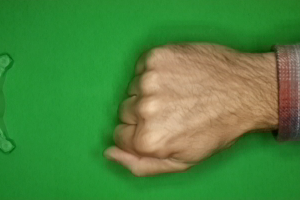

## Image Augmentation

## Processing